In [1]:
#Here we will implement previous code with the DLC package. This requires H5 files...

In [2]:
#Imports

import pandas as pd

import os
import re
import numpy as np
from sympy  import *
import matplotlib.pyplot as plt
import dlc2kinematics
from dlc2kinematics import Visualizer2D

#classes imports
from preprocessing.classes import FilterandThresholds

#Initialize classes
splitter = FilterandThresholds('tester')


In [3]:
#Lets see what the dlc2kinematics has to offer

#In this we want to import our files, load the data and extract kinematics
path = r'D:/project_deeplabcut/r&d_cam3_2D-CP-2021-07-19/results_h5/'
configCam3 = r'D:/project_deeplabcut/r&d_cam3_2D-CP-2021-07-19/config.yaml'
files = [file for file in os.listdir(path)]


#Allocate datframes
velocity = []
for file in files:

    if 'left' in file:
        data_singlereach, bodyparts, scorer = dlc2kinematics.load_data(path + file, smooth = True, filter_window=3)


        #we want to split the data into the two basic reaching components: extention and retraction
        #We need to find the max x component.
        # data_wristl_minind =np.argmin(data_singlereach[scorer]['WristL']['x'])
        # data_extention = data_singlereach.iloc[0:data_wristl_minind, :]
        data_extention = data_singlereach.iloc[0: np.armin(data_singlereach[scorer]['WristL']['x']), :]
        data_retraction = data_singlereach.iloc[np.argmin(data_singlereach[scorer]['WristL']['x']):-1, :]

        #Rescale the reaches

        #print(len(data_extention))
        #velocity
        #df_vel = dlc2kinematics.compute_velocity(data_extention,bodyparts=['WristL'], filter_window=3, order=1)
        #df_speed = dlc2kinematics.compute_speed(data_singlereach,bodyparts=['all'], filter_window=3, order=1)


#example for 1 bodypart for velocity:
    #df_vel_RBOH = dlc2kinematics.compute_velocity(reach_split,bodyparts=['WristL'],filter_window=3, order=1)
    #df_vel_RBOH.head(3)
    #dlc2kinematics.plot_velocity(df[scorer]['WristL'], df_vel_RBOH)

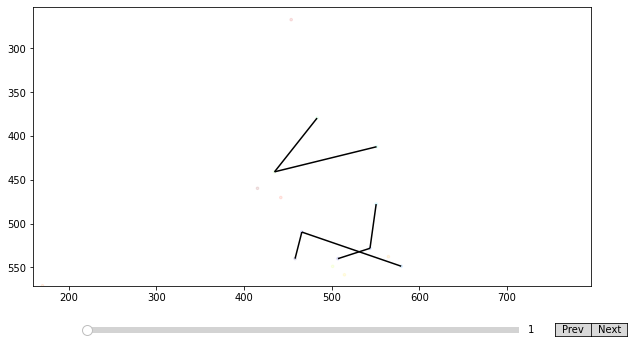

In [4]:
    viz = Visualizer2D(configCam3, r'D:/project_deeplabcut/r&d_cam3_2D-CP-2021-07-19/results_h5/undistorted_singleedit_1_behavior_test1Prev2_cam3_21055_blind_light_whisk_smell_left_success_122221.mp4DLC_resnet50_r&d_cam3_2DJul19shuffle1_400000.h5')
    viz.view(show_axes=True, show_grid=True)

#print(df_vel)
#print(df_speed)
    #To appropriately save this information, we have to build a new dataframe

In [6]:
#Lets try it for camera 2
# pathCam2 = r'D:/project_deeplabcut/r&d_cam2_2D-CP-2021-09-14/results_h5/'
# configCam2 = r'D:\project_deeplabcut\r&d_cam2_2D-CP-2021-09-14\config.yaml'
# files = [file for file in os.listdir(pathCam2)]
#
#
# #Allocate datframes
# velocity = []
# for file in files:
#     df, bodyparts, scorer = dlc2kinematics.load_data(pathCam2 + file)
#     #print(file)
#
#     #What we need here is a way to split the DF by the max value of the X-component. The max is the cut-off of the extention phase.
#
#
#     #velocity
#     df_vel = dlc2kinematics.compute_velocity(df,bodyparts=['all'], filter_window=3, order=1)
#     df_speed = dlc2kinematics.compute_speed(df,bodyparts=['all'], filter_window=3, order=1)
#
# #example for 1 bodypart for velocity:
#     df_vel_RBOH = dlc2kinematics.compute_velocity(df,bodyparts=['WristL'],filter_window=3, order=1)
#     #df_vel_RBOH.head(3)
#     #dlc2kinematics.plot_velocity(df[scorer]['WristL'], df_vel_RBOH)
#
#     viz = Visualizer2D(configCam2, pathCam2+file)
#     viz.view(show_axes=True, show_grid=True)
#
# print(df_speed)
# print(df)
print(data_extention)


scorer    DLC_resnet50_r&d_cam3_2DJul19shuffle1_400000                         \
bodyparts                                       WristR                          
coords                                               x           y likelihood   
0                                           458.141215  540.233775   0.220028   
1                                           458.075419  540.097697   0.093563   
2                                           458.312327  540.094788   0.179107   
3                                           458.430898  540.051351   0.245202   
4                                           458.370097  540.281006   0.172927   
5                                           456.488963  540.837443   0.269229   
6                                           455.699554  541.142273   0.170372   
7                                           455.108470  540.666117   0.199189   
8                                           568.565155  521.271220   0.277182   
9                           

In [ ]:
#Compute for All bodyparts:
# df_vel = dlc2kinematics.compute_velocity(df,bodyparts=['all'], filter_window=3, order=1)
# df_speed = dlc2kinematics.compute_speed(df,bodyparts=['all'], filter_window=3, order=1)
#
# #example for 1 bodypart for velocity:
# df_vel_RBOH = dlc2kinematics.compute_velocity(df,bodyparts=['WristL'],filter_window=3, order=1)
# df_vel_RBOH.head(3)

#plot 1 bodypart, including original DLC positions & new velocity:

import matplotlib.pyplot as plt
dlc2kinematics.plot_velocity(data_extention[scorer]['WristL']['x'], df_vel[scorer]['WristL']['x'])#, start=42150,end=42450) #42150:42450